<a href="https://colab.research.google.com/github/ElenaVillano/sentiment_analysis_tweets/blob/main/notebooks/modelo_ejemplo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "git+https://github.com/ElenaVillano/sentiment_analysis_tweets.git#egg=nlptweet&subdirectory=src" --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
#import re
import timeit
import string
# Nuestro paquete
import nlp


#call the nltk downloader
nltk.download('punkt')

from dateutil import parser

# Carga un set de stopwords predefinidas
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Nombramiento de columnas
col_names = ['target', # Polaridad del twet 0=negativo, 2=neutral, 4=positivo
             'ids',    # ID tweet
             'date',   # Fecha y hora del tweet
             'flag',   # QUERY
             'user',   # Usuario del tweet
             'text']   # Texto del tweety

Datos y limpieza

In [4]:
# Requiered to select a file to be imported into colab
# Not useful if running locally
from google.colab import files
uploaded = files.upload()

Saving smaller_sample_200000.csv to smaller_sample_200000.csv
Saving testdata_manual_2009_06_14.csv to testdata_manual_2009_06_14.csv


In [7]:
training =  pd.read_csv('smaller_sample_200000.csv',
                 encoding='latin-1')

In [8]:
test = pd.read_csv('testdata_manual_2009_06_14.csv', names=col_names)

In [9]:
# primera parte limpieza
from nlp.preprocessing import convierte_a_minusculas, reemplazar_urls, reemplazar_usuarios, quitar_hashtag
# minusculas
training = convierte_a_minusculas(training)
test = convierte_a_minusculas(test)
# url
training['text'] = training['text'].map(lambda s: reemplazar_urls(s))
test['text'] = test['text'].map(lambda s: reemplazar_urls(s))
# user_mention
training['text'] = training['text'].map(lambda s: reemplazar_usuarios(s))
test['text'] = test['text'].map(lambda s: reemplazar_usuarios(s))
# hashtags
training['text'] = training['text'].map(lambda s: quitar_hashtag(s))
test['text'] = test['text'].map(lambda s: quitar_hashtag(s))

# segunda parte limpieza
from nlp.preprocessing import quitar_RT, quitar_caracteres_especiales, quitar_letras_repetidas
# retweets
training['text'] = training['text'].map(lambda s: quitar_RT(s))
test['text'] = test['text'].map(lambda s: quitar_RT(s))
# caracteres especiales
training['text'] = training['text'].map(lambda s: quitar_caracteres_especiales(s))
test['text'] = test['text'].map(lambda s: quitar_caracteres_especiales(s))
# letras repetidas
training['text'] = training['text'].map(lambda s: quitar_letras_repetidas(s))
test['text'] = test['text'].map(lambda s: quitar_letras_repetidas(s))
# tercera parte limpieza
from nlp.preprocessing import quitar_nonascii, separar_abreviaciones, remove_stopwords, oracion_raiz
#nonascii
training['text'] = training['text'].map(lambda s: quitar_nonascii(s))
test['text'] = test['text'].map(lambda s: quitar_nonascii(s))
# abreviaciones
training['text'] = training['text'].map(lambda s: separar_abreviaciones(s))
test['text'] = test['text'].map(lambda s: separar_abreviaciones(s))
# stop words
training['text'] = training['text'].map(lambda s: remove_stopwords(s))
test['atext'] = test['text'].map(lambda s: remove_stopwords(s))
# raiz
training['text'] = training['text'].map(lambda s: oracion_raiz(s))
test['atext'] = test['text'].map(lambda s: oracion_raiz(s))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TOKENIZER

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers

In [11]:
# Entrena un Tokenizer. Consiste en:
# Crea un diccionario numerado de las palabras existentes en el corpus, y devuelve
# por cada palabra, el número entero de su índice en el diccionario.
# En este caso, considera las N palabras más frecuentes.
# oov_token = constante asiganda para palabras fuera del vocabulario (NOT USED HERE)
data_set_1 = training
data_set_1.shape
data_set_1.text

0         user_ment wellnot breakup speech per sebut go ...
1                                 state slow seem pick bit 
2         user_ment hey help user_ment take url behind a...
3         aw man user_ment think make see chang thing wo...
4                                            far tire work 
                                ...                        
199995       user_ment think kati perri remind situat kirk 
199996    would bf build someth w/n would much would get...
199997    tip finger hurt nervou school store tomorrow p...
199998                                    url chillin pool 
199999                      pick dog doctor note back work 
Name: text, Length: 200000, dtype: object

In [29]:
max_words = 5000
max_len = 128

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_set_1.text)



Number of words in the dictionary 81792
['ment', 'user', 'go', 'get', 'day', 'good', 'work', 'like', 'love', 'url', 'got', 'today', 'time', 'thank', 'miss', 'want', 'back', 'one', 'lol', 'know', 'u', 'feel', 'see', 'think', 'im', 'realli', 'need', 'still', 'hope', 'amp', 'night', 'watch', 'would', 'make', 'new', 'na', 'well', 'look', 'home', '2', 'come', 'oh', 'quot', 'last', 'much', 'twitter', 'great', 'morn', 'tomorrow', 'wish', 'sleep', 'wait', 'haha', 'sad', 'tri', 'fun', 'week', 'happi', 'follow', 'right', 'bad', 'could', 'thing', 'sorri', 'friend', 'say', 'tonight', 'take', 'way', 'gon', "'", 'better', 'though', 'nice', 'even', 'bed', 'hate', 'tweet', 'yeah', 'start', 'peopl', 'school', 'hour', 'play', 'show', 'weekend', 'guy', 'hey', 'final', 'next', 'soo', 'awesom', 'use', 'dont', 'ye', 'let', 'long', 'soon', 'never', 'cant', 'pleas', 'rain', 'wan', 'first', '4', 'littl', 'everyon', 'movi', 'best', 'tire', 'find', 'year', 'life', 'sick', 'aww', '3', 'girl', 'call', 'suck', 'ok'

In [33]:
print("Number of words in the dictionary", len(tokenizer.word_index))
print(list(tokenizer.word_counts))

Number of words in the dictionary 81792


AttributeError: ignored

In [46]:
hola=pd.DataFrame([(word,count) for i, (word, count) in enumerate(tokenizer.word_counts.items())])

In [53]:
hola

,0,1
0,user,99007
1,ment,99141
2,wellnot,5
3,breakup,14
4,speech,77
...,...,...
81787,liqz,1
81788,quotanni,1
81789,retardlolwhat,1
81790,cloudsit,1


In [57]:
hola=hola.sort_values(1,ascending=False).reset_index()[2:]


In [69]:
tu=hola.head(500)

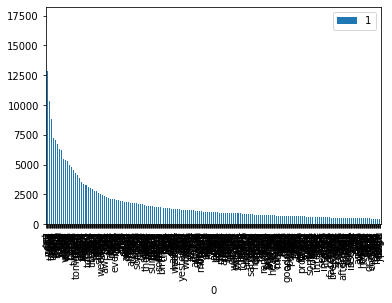

In [70]:
tu.plot.bar(x=0,y=1)

In [39]:
hola

,0,1
0,0,user
1,1,ment
2,2,wellnot
3,3,breakup
4,4,speech
...,...,...
81787,81787,liqz
81788,81788,quotanni
81789,81789,retardlolwhat
81790,81790,cloudsit


In [13]:
sequences = tokenizer.texts_to_sequences(data_set_1.text)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  382   69   54]
 [   0    0    0 ...  242  408  174]
 [   0    0    0 ...    1   19  813]
 ...
 [   0    0    0 ...   49   81   41]
 [   0    0    0 ...   10 1071  588]
 [   0    0    0 ...  765   17    7]]


SEPARAMOS TRAIN, TEST

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data_set_1.target.values, test_size=0.3, random_state=23042021)

In [16]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (140000, 128)
y_train (140000,)
X_test (60000, 128)
y_test (60000,)


In [17]:
y_train = np.where(y_train==4,1,y_train)
y_test = np.where(y_test==4,1,y_test)

In [18]:
y_train
y_test

array([1, 0, 0, ..., 0, 1, 1])

MODELADO

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1

In [25]:
# Crea una red con layers Embedding, LSTM, Dense
model = Sequential()
model.add(Embedding(input_length=128, input_dim=max_words, output_dim=64, trainable=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(units=82, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation=None))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 64)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 82)                5330      
_________________________________________________________________
dropout_3 (Dropout)          (None, 82)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 83        
Total params: 358,437
Trainable params: 358,437
Non-trainable params: 0
________________________________________________

In [26]:
# Compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=[tf.metrics.BinaryAccuracy(), 'accuracy'])

In [27]:
#%%timeit

# Train it
history_1 = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
7000/7000 [==============================] - 438s 62ms/step - loss: 0.5480 - binary_accuracy: 0.6950 - accuracy: 0.6950 - val_loss: 0.5002 - val_binary_accuracy: 0.7269 - val_accuracy: 0.7269
Epoch 2/10
7000/7000 [==============================] - 438s 63ms/step - loss: 0.4656 - binary_accuracy: 0.7653 - accuracy: 0.7653 - val_loss: 0.4892 - val_binary_accuracy: 0.7474 - val_accuracy: 0.7474
Epoch 3/10
7000/7000 [==============================] - 442s 63ms/step - loss: 0.4419 - binary_accuracy: 0.7782 - accuracy: 0.7782 - val_loss: 0.4936 - val_binary_accuracy: 0.7574 - val_accuracy: 0.7574
Epoch 4/10
2305/7000 [========>.....................] - ETA: 4:45 - loss: 0.4053 - binary_accuracy: 0.8029 - accuracy: 0.8029

KeyboardInterrupt: ignored

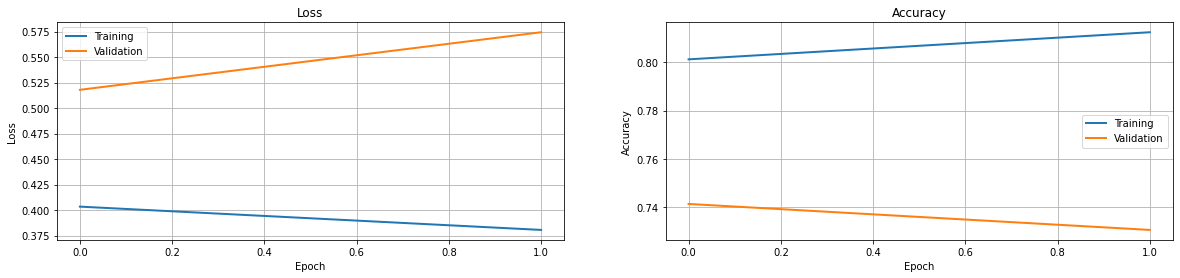

In [24]:
# Plot loss
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history_1.history['loss'], label='Training', linewidth=2)
plt.plot(history_1.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='Training', linewidth=2)
plt.plot(history_1.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()